# Julia Shaw 17.1 ([Bio](https://games.crossfit.com/athlete/259720))

<table style="float: left;border-style:hidden">
<tr style="border-style:hidden">
<td>
Age: 20 ans
</td>
</tr>
<tr style="border-style:hidden"><td>
Poids: 140 lbs
</td></tr>
<tr style="border-style:hidden"><td>
Taille:  170 cm
</td></tr>
</table>


<img style="float: right;" src="pic.jpeg">

## First attempt

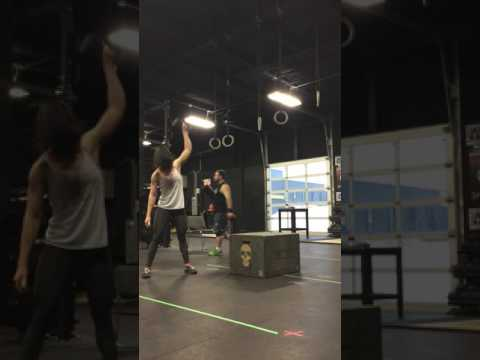

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("pXmIklJztqY")

## Methodology

* The time at each snatch was at the top position
* The time at each burpees was when the feet touch the ground on the other side of the box
* Time was taken with iPhone app [stopwatch](https://itunes.apple.com/ca/app/stopwatch-timer-pro-multiple-count-down-up/id412538313?l=fr&mt=8)

> There was a no rep at the 5m29 mark. Second rep of the round of 30 snatches

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import DataFrame
import pandas as pd
import datetime
import time
import math

In [9]:
# Read and convert checkpoints
checkpoints = [l.split('-')[1].strip() for l in open('split_times.txt').readlines()[1:-1]][::-1]
checkpoints = np.array([datetime.datetime.strptime(cp, "%H:%M:%S.%f") for cp in checkpoints])

In [10]:
# Convert checkpoints to split times
splits = (checkpoints - np.roll(checkpoints, 1))[1:]
splits = [split.total_seconds() for split in splits]

In [11]:
# Create a few labels
snatch = ['snatch'] * 10
burpees = ['burpees'] * 15
mvmt = []
round_ = []
for i in range(1,6):
    mvmt += ['snatch'] * 10 * i + ['burpees'] * 15
    round_ += ['snatch_{}'.format(i)] * 10 * i + ['burpees_{}'.format(i)] * 15

In [12]:
df = DataFrame(
    {
        "rep": range(1,226),
        "mvmt": mvmt,
        "split": splits,
        "round": round_
    }
)

Quelques détails à observer:
* La hauteur de la  barre des premières répétitions est significativement plus hautes que les autres et ceci est dû au fait que ça comptabilise le temps de transition entre les mouvements
* Il y a une bonne différence de hauteur entre le premier set de vert et le 4e. Les burpees de la 4e rondes étaient presque 2 fois plus lent que la première
* Les snatchs sont quand même constant
* L'avant dernier burpee n'a même pas prit une seconde. C'est fort probablement une erreur de celui qui prenait le temps en note.

### What to observe
* Transition time was fantastic. Nothing above 7 seconds.
* Box jump time is getting slower. We'll see it in the following graphs
* Longer rest time on top of the box in the last 2 rounds. Seen from the video.
* Slight increase in the snatches but all are well below 4 seconds

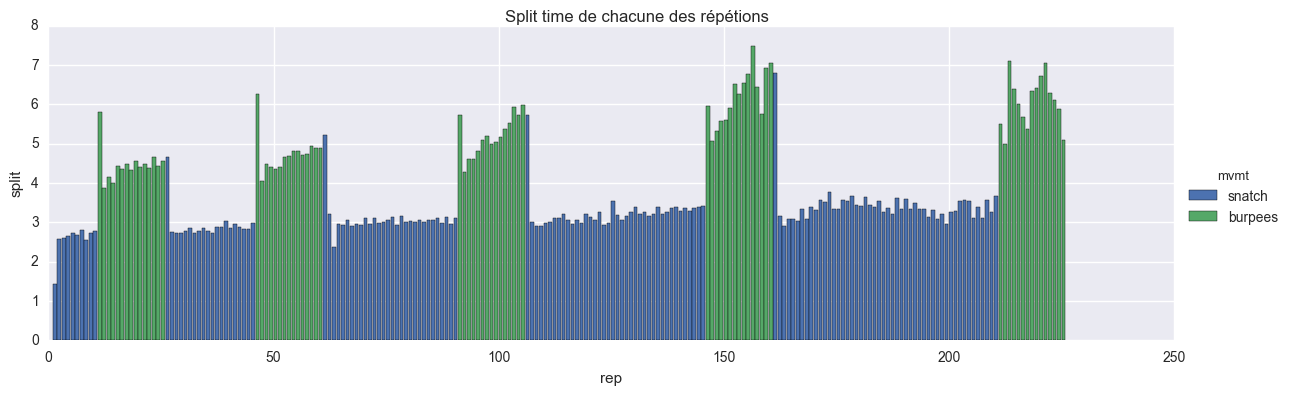

In [13]:
g = sns.FacetGrid(df, size=4, aspect=3, hue='mvmt')
g.map(plt.bar, 'rep', 'split').add_legend()
_ = g.fig.suptitle("Split time de chacune des répétions")

This is where we clearly see the increase in time of reps with burpees being the worst. 

The plot on the right shows how variable the burpees were (elongated balloons). Reproducibility of reps was an issue in burpees (but who can blame you, seriously burpees suck).

The snatches are surprisingly spot on. An example of stability and constance in each round. A slight increase in average time, but overall some would kill to have this.

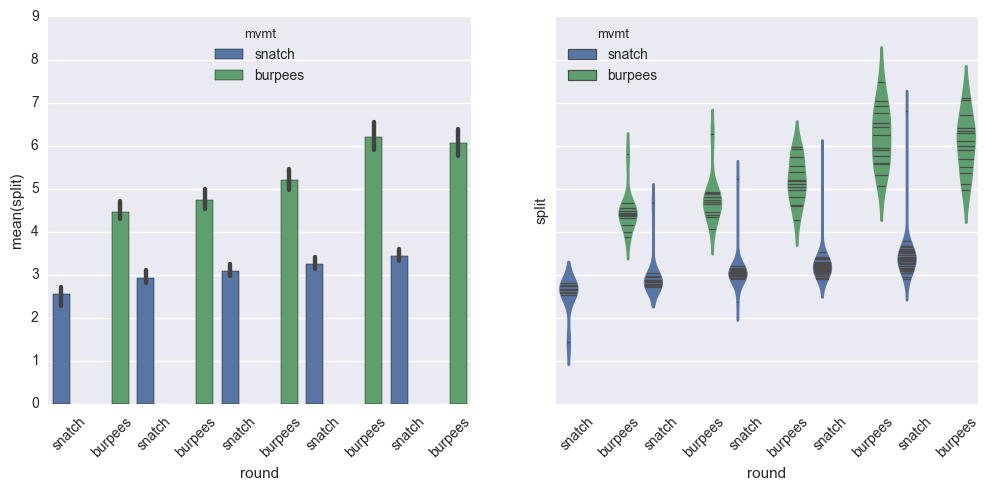

In [14]:
fix, ax = plt.subplots(1,2, figsize=(12,5), sharey=True)

g = sns.barplot(data=df, x='round', y='split', hue='mvmt', ax=ax[0])
g.set_xticklabels(
    labels=['snatch', 'burpees'] * 5, rotation=45
)

g = sns.violinplot(data=df, x='round', y='split', hue='mvmt', inner="stick", ax=ax[1])
_ = g.set_xticklabels(
    labels=['snatch', 'burpees'] * 5, rotation=45
)

#### Average time of both movements across the rounds. 
* If we compare this to Jo, the snatches are a bit slower but a lot more constant. 
* Burpees were slightly faster than Jo and a lot more stable. 

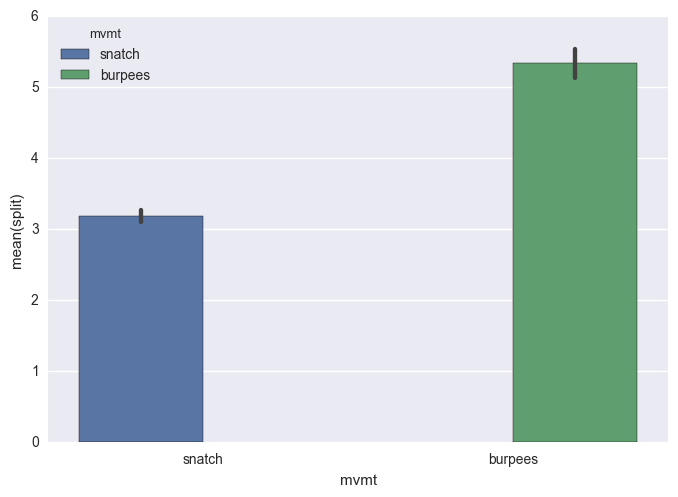

In [15]:
_ = sns.barplot(data=df, x='mvmt', y='split', hue='mvmt')

#### Total time of movements

> Be careful here. I don't know why the colors are different on that plot than on the other ones.

In [40]:
df.groupby('mvmt').sum()

,rep,split
mvmt,,
burpees,8100,400.11
snatch,17325,477.72


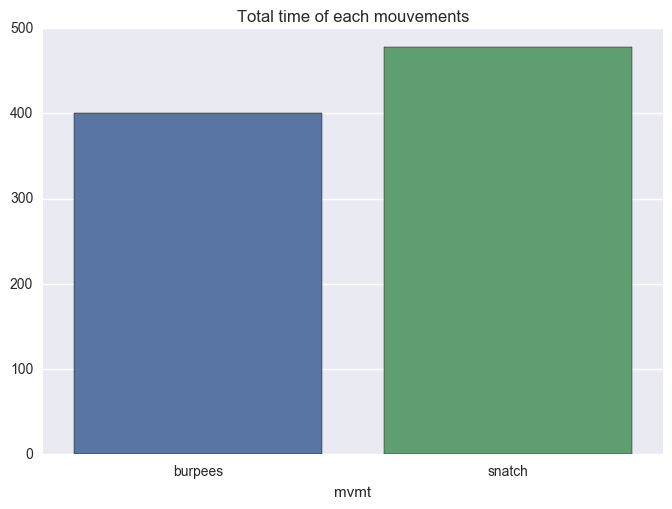

In [33]:
g = sns.barplot(data=df.groupby('mvmt').sum().reset_index(), x='mvmt', y='split')
g.set_ylabel("")
g.set_title("Total time of each mouvements")

#### Simple statistics

Let's look at the total time for the burpees across the rounds. Round 4 and 5 are costly in total time.

In [38]:
_df = df[df['mvmt'] == 'burpees'].groupby('round')['split'].sum().reset_index()
_df

,round,split
0,burpees_1,66.89
1,burpees_2,71.04
2,burpees_3,78.10
3,burpees_4,93.13
4,burpees_5,90.95


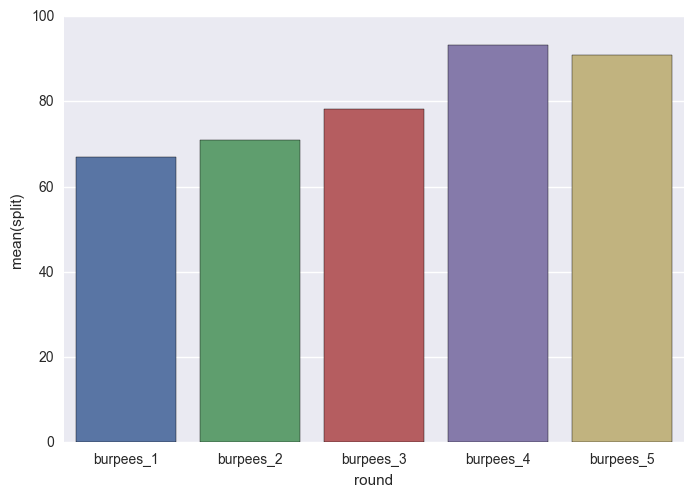

In [39]:
sns.barplot(data=_df, x='round', y='split')

####  Velocity: 0,8143 s/m

Julia's reach in snatch stance is about 1,95m from ground to middle palm. The dumbbell has to travel up and down for one rep, so double that distance to 3,9m. 150 snatches is about 587m of dumbell travel. Knowing the total time for the snatches is 478 secondes, we get a velocity of 0,8143 s/m.

In [53]:
df.groupby('mvmt').sum().ix['snatch','split']

477.71999999999963

In [54]:
velocity = df.groupby('mvmt').sum().ix['snatch','split']/587
print(velocity)

0.813833049404


#### Reduce range of motion

After some measurements Julia's leg length it about 83cm and has a normal snatch stance of 46cm between the heels. With a little bit of trigonometry we can estimate if widening her stance can help gain a few seconds.

Suppose that instead of having a reach of 1,95m (from ground to middle of palm) it was 1,93m. 2cm shorter. What kind of difference would it make. The total distance the dumbell would travel is 579m. Keeping the same velocity as calculated above we get a total time of:

In [57]:
print("At same velocity but with reach of 1,91m, total time is {:.2f}:".format(velocity*579))

At same velocity but with reach of 1,91m, total time is 471.21:


A good 6 seconds faster. Not bad. She obviously cannot cut her arms, so the only way is to have a wider stance. How wide does her feet need to be? 

In [43]:
def height(feet_distance, h):
    a = feet_distance/2
    angle = np.degrees(np.arccos(a/h))
    return h * np.sin(np.radians(angle))

In [64]:
leg_length = 83
stance = 46
distance_to_ground = height(46, 83)
print("Current distance from ground to crotch: {:.2f}cm".format(distance_to_ground))

Current distance from ground to crotch: 79.75cm


How much wider to go down 2cm?

In [75]:
new_stance = np.cos(np.arcsin((distance_to_ground-2)/leg_length))*leg_length*2
print("New stance {:.1f} vs Current stance {:.2f}".format(new_stance, stance))

New stance 58.1 VS Current stance 46.00


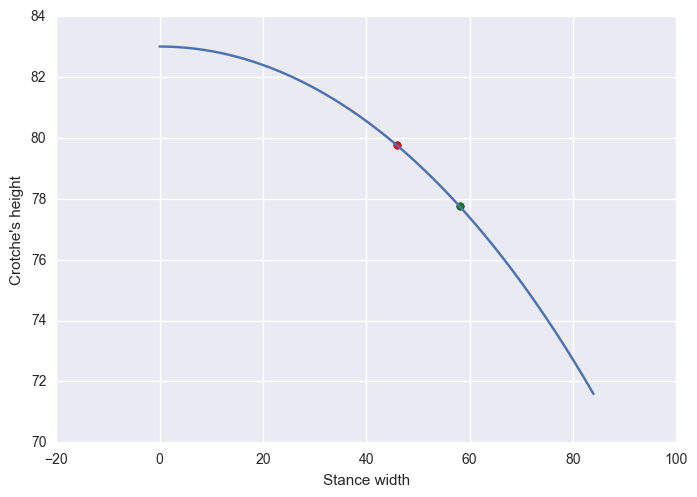

In [68]:
X = np.linspace(0, leg_length+1, leg_length)
y = height(X, leg_length)
plt.plot(X, y)
plt.xlabel("Stance width")
plt.ylabel("Crotche's height")
plt.scatter(stance, distance_to_ground, c='red', s=30)
plt.scatter(new_stance, distance_to_ground-2, c='green', s=30)

In [72]:
print("Essentially Julia needs to have a stance {:.1f}cm wider to go lower by 2cm and gain a few seconds".format(new_stance-stance))

Essentially Julia needs to have a stance 12.1cm wider to go lower by 2cm and gain a few seconds


### Final Recommendation

* Snatches are god sent. Slight increase in average over the rounds, but I wouldn't fret over it
* No spikes in snatches time. Meaning no breaks. Thumbs up
* Like Jo (and probably everyone on earth) try to cut down on burpees time. If you can limit total of round 4 and 5 to 80 seconds max (all first three rounds were below the 80 seconds mark), then you'd save about 24 seconds. It's approximatly between 0.6 and 1 second faster on each burpees.
* Widen your stance if you feel comfortable. It's 150 snatches and even though 2cm less isn't much it adds up in the end. 12cm total, 6cm on each side could help you. Use tape on the ground maybe just to be s